In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import numpy as np
from tensorflow import keras
from oodeel.utils.load_utils import get_model
from oodeel.methods import MLS
from oodeel.methods import DKNN
import tensorflow as tf
import matplotlib.pyplot as plt

from oodeel.eval.metrics import bench_metrics, get_curve
from oodeel.datasets import DataHandler


2022-10-04 15:06:53.192594: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-04 15:06:53.293806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-04 15:06:53.293912: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data and model loading
ID data: MNIST, OOD data: Fashion MNIST

In [3]:

model = get_model("../saved_models/mnist_model")

In [5]:
from oodeel.models.feature_extractor import KerasFeatureExtractor
data_handler = DataHandler()
ds1 = data_handler.load_tfds('mnist')
ds2 = data_handler.load_tfds('fashion_mnist')
x_id = ds1["test"]
x_ood = ds2["test"]
x, y = data_handler.convert_to_numpy(x_id)

x_test = data_handler.merge_tfds(x_id, x_ood, shuffle=True)

fe = KerasFeatureExtractor(model, output_layers_id = [-2])
features = fe.predict(x)
fe2 = KerasFeatureExtractor(model, output_layers_id = [], input_layer_id = -2)
output = fe2.predict(features[0])
output_true = model.predict(x)
print(np.sum(np.abs(output - output_true)))

2022-10-04 10:43:23.147930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-04 10:43:23.148822: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-04 10:43:23.149263: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (B20212474): /proc/driver/nvidia/version does not exist
2022-10-04 10:43:23.162807: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'model' is not defined

In [9]:
%autoreload 2
from oodeel.models.training_funs import train_convnet, train_keras_app

train_config = {
    "batch_size": 128,
    "epochs": 5
}
ds1 = data_handler.load_tfds('cifar10')
x_id = ds1["test"]

def reshape_im(x, y, shape):
    x = tf.image.resize(x, shape)
    return x, y

#model = train_convnet(x_id, **train_config)

x_id = x_id.map(lambda x, y: reshape_im(x, y, (224, 224)))

model = train_keras_app(x_id, model_name='EfficientNetB0', **train_config)

2022-10-04 10:46:54.684866: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:00<00:00, 12.91 url/s]
Extraction completed...: 0 file [00:00, ? file/s]
Dl Completed...: 100%|██████████| 1/1 [00:00<00:00,  9.52 url/s]


Dataset cifar10 downloaded and prepared to ~/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Epoch 1/5


ValueError: in user code:

    File "/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/pnovello/.virtualenvs/full/lib/python3.8/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 1000) are incompatible


## Maximum Logit Score
(A good classifier is all you need ?)

Example of method that does not need ID data to compute statistics to compare against

In [6]:
features[0].shape

(10000, 1600)

In [3]:
%autoreload 2

data_handler = DataHandler()
ds1 = data_handler.load_tfds('mnist')
ds2 = data_handler.load_tfds('fashion_mnist')
x_id = ds1["test"]
x_ood = ds2["test"]


x_test = data_handler.merge_tfds(x_id, x_ood, shuffle=True)

2022-09-30 19:04:08.694902: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [13]:
%autoreload 2
from oodeel.models.feature_extractor import KerasFeatureExtractor

fextr = KerasFeatureExtractor(model, output_layers_id = [], output_activation="linear")
a = fextr.predict(x_id)


40/40 [==============================] - 1s 24ms/step


In [6]:

%autoreload 2

oodmodel = MLS()
oodmodel.fit(model)
scores = oodmodel.score(x_test)

79/79 [==============================] - 5s 47ms/step


In [16]:
print(a[0].shape)

(10000, 10)


Score visualization

40/40 [==============================] - 1s 28ms/step


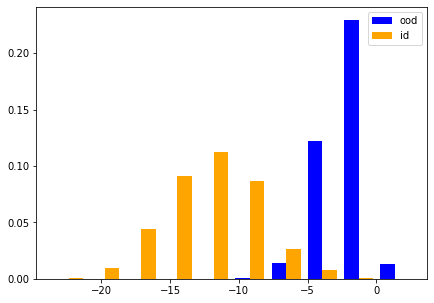

In [19]:
%autoreload 2

plt.figure(figsize=(7,5))

scores_id, scores_ood = oodmodel.score([x_id, x_ood])
plt.hist((scores_ood, scores_id), bins=10, color=("blue", "orange"), label=("ood", "id"), density=True)
plt.legend()
plt.show()

Sanity check to test the `__call__` method

In [20]:
oodmodel.threshold = -5
isooddata = oodmodel.isood(inputs=x_ood)
isooddata2 = oodmodel(x_ood)
print(np.sum(isooddata - isooddata2))
print(np.sum(isooddata)/x_ood.cardinality())


40/40 [==============================] - 1s 24ms/step
0.0
tf.Tensor(0.949, shape=(), dtype=float64)


## Deep KNN
Example of method that needs ID data to compute statistics to compare against

In [23]:
data_handler = DataHandler()
ds1 = data_handler.load_tfds('mnist')
ds2 = data_handler.load_tfds('fashion_mnist')
x_id = ds1["test"]
x_ood = ds2["test"]
x_train = ds1["train"]


x_test = data_handler.merge_tfds(x_id.take(1000), x_ood.take(1000), shuffle='True')

x_tf = x_id.map(lambda x, y: x)
a = tf.constant(1)
print(float(tf.math.reduce_max(a)))

x_tf.reduce(0., lambda x, y: float(tf.math.reduce_max(tf.maximum(x, y))))

True
1.0


2022-10-04 15:30:01.820368: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [26]:
%autoreload 2
oodmodel = DKNN()
oodmodel.fit(model, x_train.take(10000))
scores = oodmodel.score(x_test)

2022-09-30 19:16:30.462170: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


40/40 [==============================] - 2s 29ms/step


2022-09-30 19:16:32.008838: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-09-30 19:16:32.621969: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-09-30 19:16:32.725778: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. I

1/8 [==>...........................] - ETA: 3s

2022-09-30 19:16:33.076569: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-09-30 19:16:33.234970: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


8/8 [==============================] - 1s 22ms/step


Score visualization

In [12]:
%autoreload 2
plt.figure(figsize=(8,5))


x_id, y_id = data_handler.convert_to_numpy(x_id)
x_ood, y_ood = data_handler.convert_to_numpy(x_ood)
scores_id, scores_ood = oodmodel.score([x_id[:1000], x_ood[:1000]])
plt.hist((scores_ood, scores_id), bins=30, color=("blue", "orange"), label=("ood", "id"), density=True)
plt.legend()
plt.show()

Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f048c2d2670>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: tf.reduce_any(tf.equal(y, split)))
# coding=utf-8
(lambda x, y: (not tf.reduce_any(tf.equal(y, split))))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: add_label(x, y, 0))
# coding=utf-8
(lambda x, y: add_label(x, y, 1))
# coding=utf-8
(lambda x, y, z: z)
# coding=utf-8
(lambda x, y: x)
# coding=utf-8
(lambda x, y: y)
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: y)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f048c2d2670>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: tf.reduce_any(tf.equal(y, split)))
# coding=utf-8
(lambda x, y: (not tf.reduce_any(tf.equal(y, split))))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: add_label(x, y, 0))
# coding=utf-8
(lambda x, y: add_label(x, y, 1))
# coding=utf-8
(lambda x, y, z: z)
# coding=utf-8
(lambda x, y: x)
# coding=utf-8
(lambda x, y: y)
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: y)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f048c2d2670>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: tf.reduce_any(tf.equal(y, split)))
# coding=utf-8
(lambda x, y: (not tf.reduce_any(tf.equal(y, split))))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: add_label(x, y, 0))
# coding=utf-8
(lambda x, y: add_label(x, y, 1))
# coding=utf-8
(lambda x, y, z: z)
# coding=utf-8
(lambda x, y: x)
# coding=utf-8
(lambda x, y: y)
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: y)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f04ac5a35e0>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y

Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f04ac5a35e0>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: tf.reduce_any(tf.equal(y, split)))
# coding=utf-8
(lambda x, y: (not tf.reduce_any(tf.equal(y, split))))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: add_label(x, y, 0))
# coding=utf-8
(lambda x, y: add_label(x, y, 1))
# coding=utf-8
(lambda x, y, z: z)
# coding=utf-8
(lambda x, y: x)
# coding=utf-8
(lambda x, y: y)
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: y)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f04ac5a35e0>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: tf.reduce_any(tf.equal(y, split)))
# coding=utf-8
(lambda x, y: (not tf.reduce_any(tf.equal(y, split))))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: add_label(x, y, 0))
# coding=utf-8
(lambda x, y: add_label(x, y, 1))
# coding=utf-8
(lambda x, y, z: z)
# coding=utf-8
(lambda x, y: x)
# coding=utf-8
(lambda x, y: y)
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: y)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f04ac5a35e0>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y

Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f04ac5a35e0>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: tf.reduce_any(tf.equal(y, split)))
# coding=utf-8
(lambda x, y: (not tf.reduce_any(tf.equal(y, split))))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: add_label(x, y, 0))
# coding=utf-8
(lambda x, y: add_label(x, y, 1))
# coding=utf-8
(lambda x, y, z: z)
# coding=utf-8
(lambda x, y: x)
# coding=utf-8
(lambda x, y: y)
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: y)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f04ac5a35e0>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: tf.reduce_any(tf.equal(y, split)))
# coding=utf-8
(lambda x, y: (not tf.reduce_any(tf.equal(y, split))))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: add_label(x, y, 0))
# coding=utf-8
(lambda x, y: add_label(x, y, 1))
# coding=utf-8
(lambda x, y, z: z)
# coding=utf-8
(lambda x, y: x)
# coding=utf-8
(lambda x, y: y)
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: y)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f048c4f9700>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y

Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f048c4f9700>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: tf.reduce_any(tf.equal(y, split)))
# coding=utf-8
(lambda x, y: (not tf.reduce_any(tf.equal(y, split))))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: add_label(x, y, 0))
# coding=utf-8
(lambda x, y: add_label(x, y, 1))
# coding=utf-8
(lambda x, y, z: z)
# coding=utf-8
(lambda x, y: x)
# coding=utf-8
(lambda x, y: y)
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: y)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function DataHandler.convert_to_numpy.<locals>.<lambda> at 0x7f048c4f9700>: no matching AST found among candidates:
# coding=utf-8
(lambda x, y: tf.reduce_any(tf.equal(y, split)))
# coding=utf-8
(lambda x, y: (not tf.reduce_any(tf.equal(y, split))))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: reshape_im(x, y, shape))
# coding=utf-8
(lambda x, y: add_label(x, y, 0))
# coding=utf-8
(lambda x, y: add_label(x, y, 1))
# coding=utf-8
(lambda x, y, z: z)
# coding=utf-8
(lambda x, y: x)
# coding=utf-8
(lambda x, y: y)
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: ((x / 255), y))
# coding=utf-8
(lambda x, y: y)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


NameError: name 'oodmodel' is not defined

<Figure size 576x360 with 0 Axes>

In [ ]:
data_handler = DataHandler()
(x_train, y_train),  (x_test, y_test) = data_handler.load_tfds('mnist', as_numpy=True)
print(x_train.shape)

(60000, 28, 28, 1)
